In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn import preprocessing

In [38]:
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('wordnet') 
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\SUJAY
[nltk_data]     KHOND\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SUJAY
[nltk_data]     KHOND\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SUJAY
[nltk_data]     KHOND\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\SUJAY
[nltk_data]     KHOND\AppData\Roaming\nltk_data...


True

In [31]:
df = pd.read_csv('IMDB Dataset.csv')
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer() 

In [39]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]
    return ' '.join(tokens)
df['review'] = df['review'].apply(preprocess_text)
le = preprocessing.LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['review'],df['sentiment'], test_size=0.2,
                 random_state=42)
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)
# Train KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_bow, y_train)

KNeighborsClassifier()

In [34]:
KNeighborsClassifier()

KNeighborsClassifier()

In [35]:
y_pred = clf.predict(X_test_bow)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         9
    positive       1.00      0.18      0.31        11

    accuracy                           0.55        20
   macro avg       0.75      0.59      0.49        20
weighted avg       0.78      0.55      0.47        20



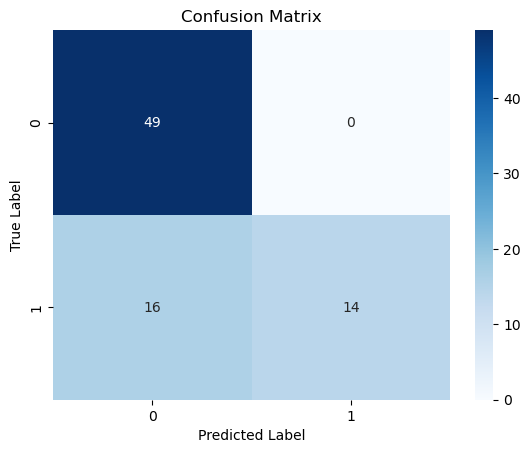

In [36]:
conf_matrix = confusion_matrix(y_train, clf.predict(X_train_bow))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()